# Grunnleggende analyse

**Desktiptiv statistikk**
- Gjennomsnitt
- Median
- Modus
- Spredning
    - Varians
    - standardavvik
    - Kvalitetsavstand
    
**Korrelasjon vs Kausalitet**

- **Korrelasjon** innebærer en statistisk sammenheng mellom to variabler, noe som betyr at når en variabel beveger seg i en bestemt retning, tenderer den andre variabelen til å bevege seg i samme eller motsatt retning. Det er viktig å merke seg at korrelasjon ikke impliserer årsakssammenheng

- **Kausalitet** (årsakssammenheng) indikerer at endringer i en variabel direkte forårsaker endringer i en annen. For å etablere kausalitet, må forskere ofte bruke kontrollerte eksperimenter.


In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Hente datasettet fra Excel
df = pd.read_excel('Vaktutkallingar Frode.xlsx')
df

,hend_id,alvorlighetsgrad,bestillande_eining,dato,jobbliste_type,signatur,jobb_status,onska_ferdig_dato,prioritet,estimert_tid,...,sum_timar,fagomraade_kode,planlagt_ferdig_dato,driftsstans_j_n,ao_tekst,hendelse_tekst,hendelse_opphav,planansv_id,abc_indikator,anllin_id
0,672622,NaN,NaN,2021-01-01 09:25:51,1,ola,4,2021-01-01 09:25:44,3,4.0,...,1.5,2.0,2021-01-01 09:25:44,NaN,Får melding om at annlegget står i ein umulig ...,Får melding om at annlegget står i ein umulig ...,NaN,13795.0,1.0,NaN
1,672623,NaN,NaN,2021-01-01 10:53:44,1,ola,4,2021-01-01 10:53:35,3,4.0,...,3.5,2.0,2021-01-01 10:53:35,NaN,Vaier på opptrekk for tappeluke er nesten av,Vaier på opptrekk for tappeluke er nesten av,NaN,13794.0,3.0,NaN
2,672698,NaN,NaN,2021-01-02 05:54:55,1,esis,4,2021-01-02 05:54:47,3,3.0,...,2.1,2.0,2021-01-02 05:54:47,NaN,Alarm på lavt oljetrykk. Fleire kokiller gir n...,Alarm på lavt oljetrykk. Fleire kokiller gir n...,NaN,13794.0,3.0,NaN
3,672708,NaN,NaN,2021-01-02 11:48:47,1,ola,4,2021-01-02 11:48:39,3,4.0,...,3.9,2.0,2021-01-02 11:48:39,NaN,Oljepumpe kokillbord gir for lavt trykk,Oljepumpe kokillbord gir for lavt trykk,NaN,13794.0,1.0,NaN
4,672712,NaN,NaN,2021-01-02 17:24:33,1,a160334,4,2021-01-02 17:24:18,3,2.0,...,2.0,2.0,2021-01-02 17:24:18,NaN,Får ikke signal på at luke er igjen. Luke tar ...,Får ikke signal på at luke er igjen. Luke tar ...,NaN,13795.0,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,730810,NaN,NaN,2022-05-30 21:44:44,1,a224403,6,2022-05-30 21:44:21,3,NaN,...,NaN,2.0,2022-05-30 21:44:21,NaN,Lås på vogn går ikke opp ---> Dobbelbestillin...,Lås på vogn går ikke opp,NaN,13795.0,3.0,NaN
581,743028,NaN,NaN,2022-09-10 11:52:30,1,a162353,6,2022-09-10 11:51:35,3,NaN,...,NaN,5.0,2022-09-10 11:51:35,NaN,Mek.vakt. var allerede ute. Dør på varmekammer...,Mek.vakt. var allerede ute. Dør på varmekammer...,NaN,NaN,NaN,NaN
582,751453,NaN,NaN,2022-11-14 16:14:53,1,a150780,6,2022-11-14 16:14:34,3,NaN,...,NaN,2.0,2022-11-14 16:14:34,NaN,rotor/stator 2 er defekt.,rotor/stator 2 er defekt.,NaN,13794.0,3.0,NaN
583,765697,NaN,NaN,2023-03-11 17:06:03,1,a150780,6,2023-03-11 17:05:38,3,NaN,...,NaN,2.0,2023-03-11 17:05:38,NaN,Metall nede i rotor/labyrint på rotor 2. ---> ...,Metall nede i rotor/labyrint på rotor 2.,NaN,13794.0,3.0,NaN


---

## Gjennomsnitt

>Gjennomsnitt (eller middelverdi) er summen av alle datapunktene delt på antall datapunkter.

**Vær Forsiktig med å bruke gjennomsnitt:**

- **Outliers**: Gjennomsnittet kan bli forvrengt av outliers - ekstremt høye eller lave verdier. For eksempel, hvis en jobb tok unormalt lang tid, kan det gjøre gjennomsnittet misvisende.
- **Skjevhet**: Hvis dataene dine er skjevfordelt, kan gjennomsnittet gi et misvisende bilde. Med skjeve data er medianen ofte en bedre sentral tendensmåler.
- **Urepresentativt**: Gjennomsnittet alene gir ikke en fullstendig forståelse av dataene dine. Det forteller ingenting om spredningen eller fordelingen av de individuelle verdiene.

In [191]:
gjennomsnitt_total_fakt = np.average(df['sum_timar'].dropna())

# Lager en tekst jeg ønsker å bruke ofte
prefix = "Gjennomsnitt av sum_timar [{}] {}: \n---------------------------------- \n"

print(prefix.format("Total", gjennomsnitt_total_fakt.round(2)))

# Gjennomsnitt for alle unike "kostnads_stad_navn" for faktisk tid
gruppert_kostnad = df.dropna(subset=['sum_timar']).groupby('kostnad_stad_navn')['sum_timar'].mean().sort_values(ascending=False)
print(prefix.format("Gruppert etter kostnads_stad_navn", gruppert_kostnad.round(2)))


Gjennomsnitt av sum_timar [Total] 5.34: 
---------------------------------- 

Gjennomsnitt av sum_timar [Gruppert etter kostnads_stad_navn] kostnad_stad_navn
Konti homogenisering          6.87
Slagganlegg, støyperi         6.58
Støyping                      5.39
Sag/pakking                   5.14
Støyperiproduksjon, felles    4.47
Batch homogenisering          4.26
Kvalitetskontroll             4.00
Støypeovnar                   1.67
Name: sum_timar, dtype: float64: 
---------------------------------- 



### Kombinere total antall vaktutkallinger og gjennomsnitt for hver unik "kostnads_stad_navn"

**NB!** Det er to Y-akser: 
- **Høyreside** for antall vaktutkalliger 
- **Venstreside:** for gjennomsnitt_sum_timar

Hvert punkt for gjennomsnitt og antall tilhørere respektive x-akse navn



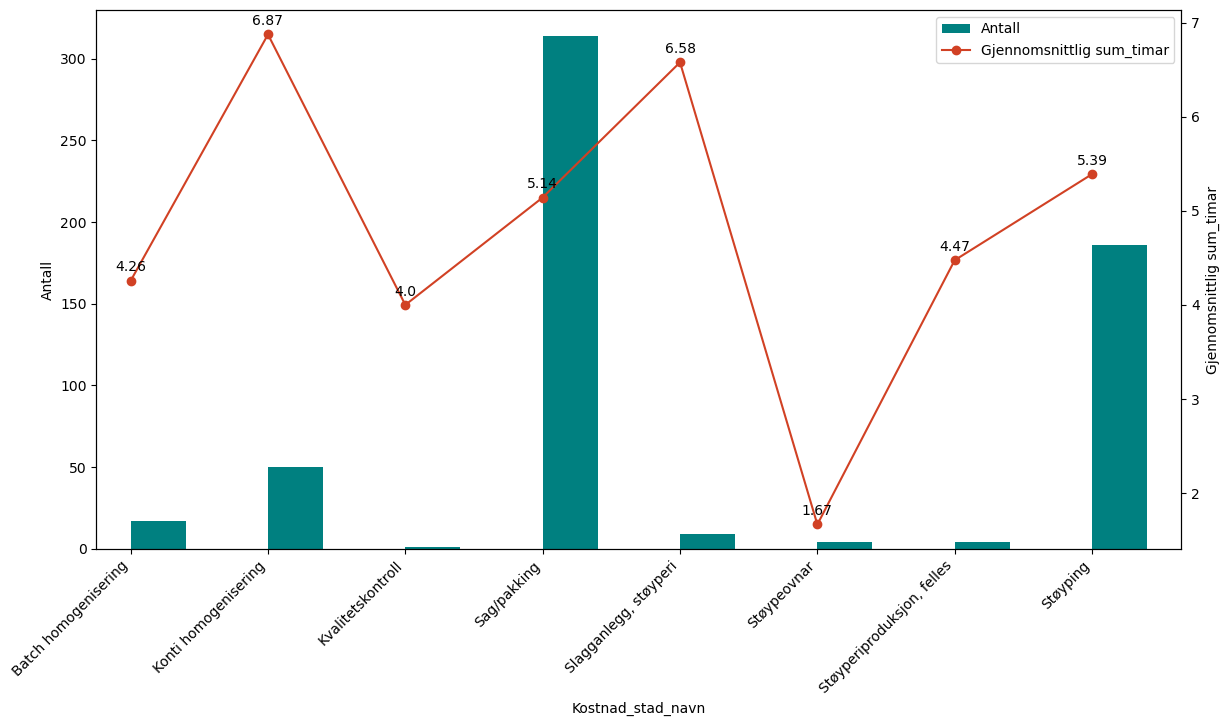

,Total_vakt_Utkallinger,Gjennomsnitt
Batch homogenisering,17,4.26
Konti homogenisering,50,6.87
Kvalitetskontroll,1,4.00
Sag/pakking,314,5.14
"Slagganlegg, støyperi",9,6.58
Støypeovnar,4,1.67
"Støyperiproduksjon, felles",4,4.47
Støyping,186,5.39


In [192]:
import matplotlib.pyplot as plt

# Beregn antall verdier og gjennomsnittene
antall_verdier = df['kostnad_stad_navn'].value_counts().sort_index()
gjennomsnittsverdier = df.dropna(subset=['sum_timar']).groupby('kostnad_stad_navn')['sum_timar'].mean().loc[antall_verdier.index]

# Start plotting av stolpediagram
fig, ax1 = plt.subplots(figsize=(14, 7))

# Stolpediagram for antall verdier
antall_verdier.plot(kind='bar', ax=ax1, color='teal', label='Antall', width=0.4, position=0)

# Opprett en sekundær y-akse for gjennomsnittsverdier
ax2 = ax1.twinx()

# Plott gjennomsnittsverdier som et linjediagram på sekundær y-akse
gjennomsnittsverdier.plot(kind='line', ax=ax2, color='#d14124', marker='o', label='Gjennomsnittlig sum_timar')

# Legge til gjennomsnittsverdier som tekst på grafen
for i, gjennomsnitt in enumerate(gjennomsnittsverdier):
    ax2.text(i, gjennomsnitt+0.1, str(round(gjennomsnitt, 2)), color='black', ha='center')


# Etiketter og titler
ax1.set_xlabel('Kostnad_stad_navn')
ax1.set_ylabel('Antall')
ax2.set_ylabel('Gjennomsnittlig sum_timar')

# Juster x-aksen for å vise navnene tydeligere
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Legende
# Vi må manuelt legge til legendene siden vi nå har to forskjellige akser.
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc='best')

# Vis diagram
plt.show()


antall_verdier = df['kostnad_stad_navn'].value_counts()
gjennomsnittsverdier = df.dropna(subset=['sum_timar']).groupby('kostnad_stad_navn')['sum_timar'].mean()


antall_verdier_df = pd.DataFrame({
    'Total_vakt_Utkallinger': antall_verdier, 
    'Gjennomsnitt': gjennomsnittsverdier.round(2)
})

antall_verdier_df


### **Fallgruver**:

- **Feiltolkning**: Gjennomsnittet representerer ikke nødvendigvis det "typiske" scenarioet hvis dataene har stor spredning.
- **Ufullstendige Data**: Hvis datasettet ditt har mange manglende verdier, kan gjennomsnittet bli upålitelig med mindre disse håndteres riktig.
- **Ensidig Bruk**: Å stole utelukkende på gjennomsnittet uten å vurdere andre deskriptive statistikker (som median, modus, spredning) kan føre til dårlige analytiske beslutninger.

----

## Median

>Median er det midterste datapunktet i en datasett som er sortert i stigende eller synkende rekkefølge.

**Hvorfor bruker vi median?**

- Eksempel: 
    - For å finne midtpunktet av tidsbruken på jobber, som gir en bedre forståelse av et "typisk" tidsbruk når dataene er skjeve.
- Når man ønsker å forstå den sentrale tendensen i en distribusjon som ikke påvirkes av ekstreme verdier.

**Vær oppmerksom ved bruk av Median:**

- **Ikke Informativ alene:** Medianen gir ikke informasjon om variasjonen i dataene eller om det er flere toppunkt i datasettet.
- **Skjulte detaljer:** To datasett med svært forskjellige fordelinger kan ha samme median, så det er viktig å vurdere den sammen med andre mål på spredning.

---

#### Utregning av median for totalt og hver unik kostnads_stad_navn:



In [193]:
# Finn medianen for 'sum_timar' kolonnen
median_total_fakt = df['sum_timar'].median()

# Skriv ut medianen med prefix-teksten
print("Median totalt", round(median_total_fakt, 2))

# For å finne medianen for hver unik 'kostnads_stad_navn'
gruppert_kostnad_median = df.dropna(subset=['sum_timar']).groupby('kostnad_stad_navn')['sum_timar'].median().sort_values(ascending=False)

# Skriv ut medianene for hver gruppe
print("Median gruppert etter kostnads_stad_navn", gruppert_kostnad_median.round(2))


Median totalt 3.5
Median gruppert etter kostnads_stad_navn kostnad_stad_navn
Kvalitetskontroll             4.00
Konti homogenisering          3.65
Støyping                      3.60
Sag/pakking                   3.50
Batch homogenisering          2.75
Slagganlegg, støyperi         2.00
Støypeovnar                   2.00
Støyperiproduksjon, felles    1.75
Name: sum_timar, dtype: float64


#### Median og gjennomsnitt

**Når du vurderer forskjellen mellom gjennomsnitt og median:**

- Hvis **gjennomsnittet er høyere enn medianen**, kan det tyde på en skjevfordeling med en lang hale på høyre side av fordelingen (positiv skjevhet). Dette betyr at det er noen få svært høye verdier i datasettet som trekker gjennomsnittet oppover.

- Hvis **gjennomsnittet er lavere enn medianen**, kan det indikere en skjevfordeling med en lang hale på venstre side av fordelingen (negativ skjevhet). Dette betyr at det er noen få svært lave verdier som trekker gjennomsnittet nedover.

- **Hvis gjennomsnittet er veldig nært medianen**, antyder det at dataene er mer symmetrisk fordelt, altså uten betydelig skjevhet.

In [136]:

antall_verdier_df = pd.DataFrame({
    'Total_vakt_Utkallinger': antall_verdier, 
    'Gjennomsnitt': gjennomsnittsverdier.round(2),
    'Median': gruppert_kostnad_median.round(2),
    'Differanse %': ((gjennomsnittsverdier - gruppert_kostnad_median) * 100 / gruppert_kostnad_median ).round(2)
})

antall_verdier_df


,Total_vakt_Utkallinger,Gjennomsnitt,Median,Differanse %
Batch homogenisering,17,4.26,2.75,54.77
Konti homogenisering,50,6.87,3.65,88.33
Kvalitetskontroll,1,4.00,4.00,0.00
Sag/pakking,314,5.14,3.50,46.89
"Slagganlegg, støyperi",9,6.58,2.00,228.89
Støypeovnar,4,1.67,2.00,-16.67
"Støyperiproduksjon, felles",4,4.47,1.75,155.71
Støyping,186,5.39,3.60,49.71


#### **Plotte histogram**

**Hva er et histogram?**

Et histogram er en type diagram som viser hvor ofte ulike verdier opptrer i et datasett. Det ligner på et stolpediagram, men i stedet for hver stolpe som representerer en kategori, representerer hver stolpe et intervall av tall (kalt en "bin"). Høyden på hver stolpe viser hvor mange verdier fra datasettet som faller innenfor det intervallet.

For eksempel, hvis du har et datasett med aldre på en gruppe mennesker, kan et histogram ha stolper som representerer antall personer i aldersgruppene 0-9 år, 10-19 år, 20-29 år, og så videre. En høy stolpe betyr at mange mennesker faller inn i det aldersintervallet.

Histogrammer er nyttige for å se fordelingen av numeriske data og for å identifisere mønstre som skjevhet, toppunkt (hvor mange topper dataene har) og om det er noen uvanlige verdier (uteliggere).

![image.png](skjevhet)
![image.png](hoyreskjev)
![image.png](venstreskjev)



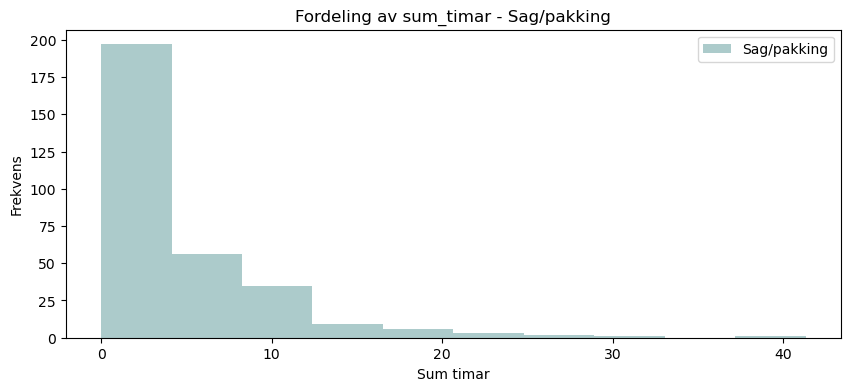

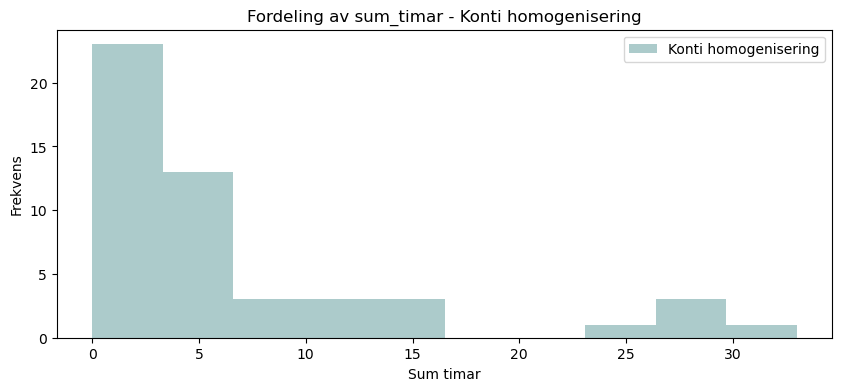

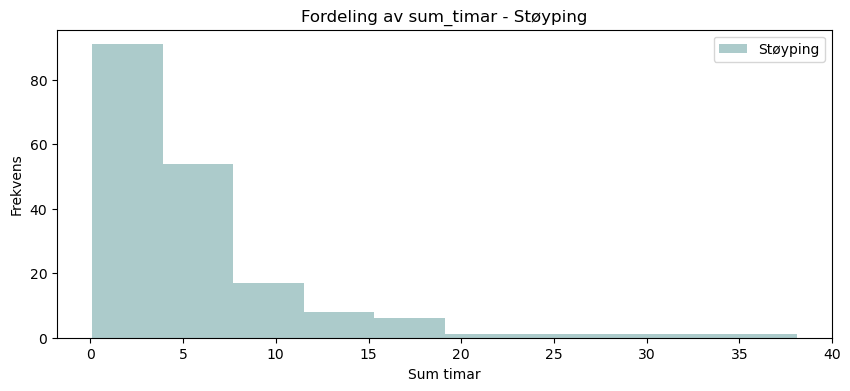

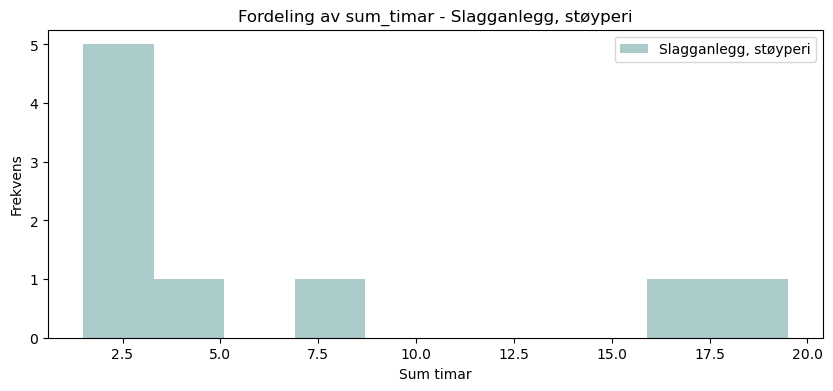

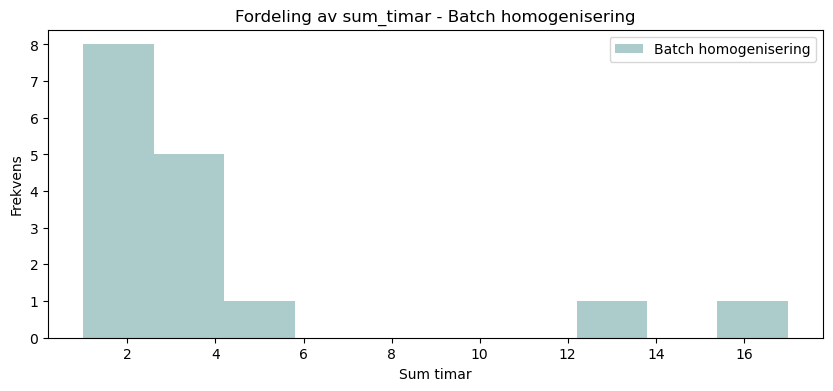

In [172]:
import matplotlib.pyplot as plt

# Lag en liste med de valgte 'kostnad_stad_navn'
valgte_steder = ['Sag/pakking', 'Konti homogenisering', 'Støyping', 'Slagganlegg, støyperi','Batch homogenisering'	]

# Filtrer DataFrame for å inkludere bare de valgte stedene
filtrert_df = df[df['kostnad_stad_navn'].isin(valgte_steder)]

# Plot et histogram for å illustrere fordelingen av 'sum_timar' for hvert sted
for sted in valgte_steder:
    subset = filtrert_df[filtrert_df['kostnad_stad_navn'] == sted]['sum_timar']
    plt.figure(figsize=(10, 4))
    plt.hist(subset, bins=10, alpha=0.7, label=sted, color='#89b6b5')
    plt.title(f'Fordeling av sum_timar - {sted}')
    plt.xlabel('Sum timar')
    plt.ylabel('Frekvens')
    plt.legend()
    plt.show()


--- 

## Modus

>Modus er det datapunktet som forekommer oftest i datasettet.


**Bruk av Modus:**

- For å identifisere den mest frekvente hendelsen, for eksempel den mest rapporterte typen av driftsstans.
- Nyttig i kategoriske data hvor gjennomsnitt og median ikke gir mening, som f.eks. den mest brukte leverandøren eller deltypen.


**Vær oppmerksom ved bruk av Modus:**

- **Ikke alltid Nyttig:** Modus er ikke nyttig hvis alle verdier bare forekommer én gang eller hvis det er flere verdier som forekommer like ofte.
- **Misvisende i små datasett:** I små datasett kan modus tilfeldigvis peke på et ikke-representativt element.


### Signatur

Hvor mange ganger har operatørene vært på utkalling?

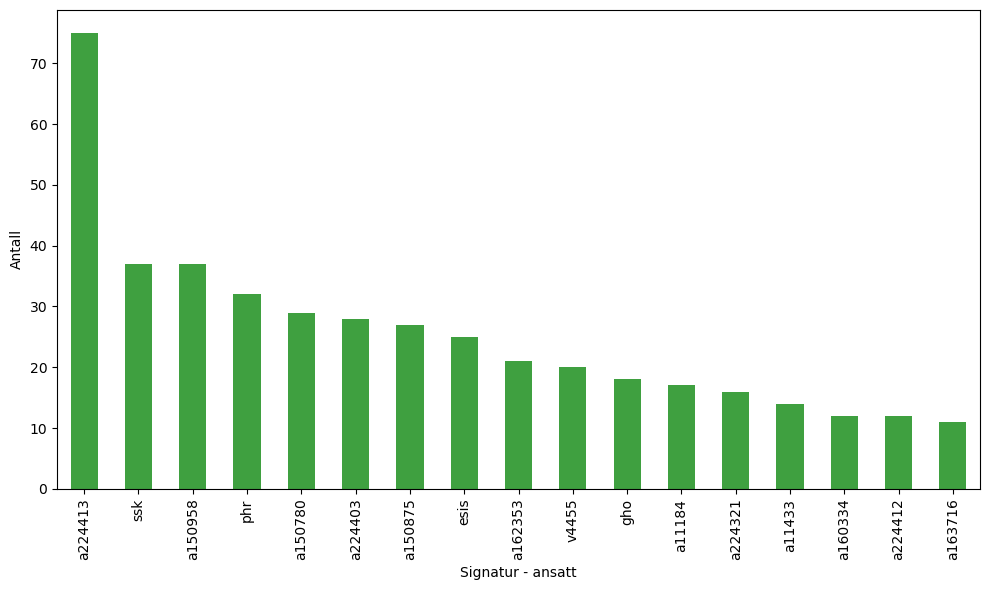

In [190]:

# Få antall unike signaturer
signatur_counts = df['signatur'].value_counts()

# Filtrer signaturene som har mer enn "antall_signatur" 
# Du kan selv endre på antall_signatur for å excludere de so mhar få
antall_signatur = 10
filtered_signatur_counts = signatur_counts[signatur_counts > antall_signatur]

# Lage bar-plot
filtered_signatur_counts.plot(kind='bar', figsize=(10,6), xlabel="Signatur - ansatt", ylabel="Antall", color='#3fA040')

# Vis plottet
plt.tight_layout()
plt.show()